<a href="https://colab.research.google.com/github/Ayush-Rawal/ML-lab/blob/master/DecisionTreeRegresser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [39]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data[:, 12], columns=["LSTAT"])
df.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [40]:
# df.columns = ['LSTAT']
df['MEDV'] = boston.target                 # Create new column with the target MEDV
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [0]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [47]:
regressor = DecisionTreeRegressor(criterion='mse', random_state = 0, max_depth=3)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
y_pred = regressor.predict(X_test)

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.575894755271583
Mean Squared Error: 34.42162438298501
Root Mean Squared Error: 5.8669944931783435


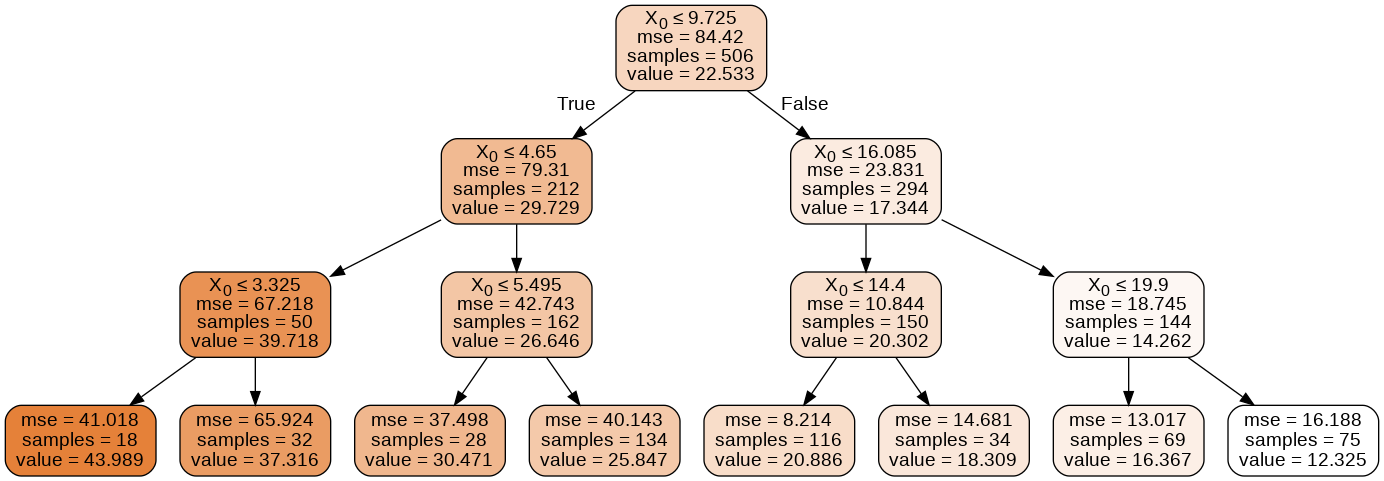

In [50]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, 
                 filled = True, rounded = True,
               special_characters=True, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('pima-indians-diabetes.png')
Image(graph.create_png())
